### Load the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Create function

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def creat_validation_framework (x=42):
    # Validation framework
    n = len(df)

    # 确定train,val,test的大小
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    # 设定shuffle随机数
    np.random.seed(x)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    # 分别得到train,val,test数据集
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # 重置index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Y值, 且删除原数据集的Y
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

### Download/Get the dataset

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

!wget $data -O laptops.csv

--2025-07-27 08:41:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.004s  

2025-07-27 08:41:34 (65.1 MB/s) - ‘laptops.csv’ saved [298573/298573]



### Preparing the dataset

In [3]:
df = pd.read_csv('laptops.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

names = ['ram', 'storage', 'screen', 'final_price']

df = df[names]

### EDA

Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

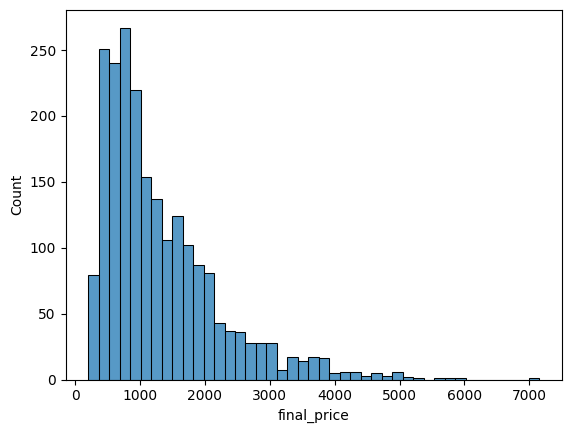

In [5]:
sns.histplot(df.final_price)

<Axes: ylabel='Count'>

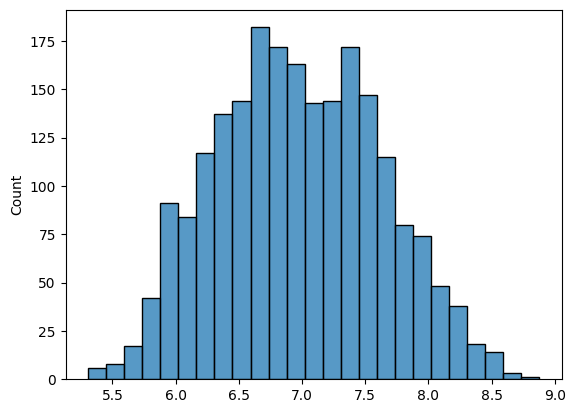

In [6]:
# log1 plus to get normal distribution
sns.histplot(np.log1p(df.final_price.values))

### Question 1 & Question 2

In [7]:
print(df.dtypes)

print('\n')

print('Question 1')
print(df.isnull().sum())

print('\n')

print('Question 2')
print('ram meadian is', df.describe().loc['50%','ram'])

ram              int64
storage          int64
screen         float64
final_price    float64
dtype: object


Question 1
ram            0
storage        0
screen         4
final_price    0
dtype: int64


Question 2
ram meadian is 16.0


### Prepare and split the dataset
**Shuffle the dataset (the filtered one you created above), use seed *42*.**

**Split your data in train/val/test sets, with 60%/20%/20% distribution.**

Use the same code as in the lectures

In [ ]:
# Validation framework
n = len(df)

# 确定train,val,test的大小
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# 设定shuffle随机数
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# 分别得到train,val,test数据集
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# 重置index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Y值, 且删除原数据集的Y
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

#### Linear regression (without regularization)

In [12]:
# column 'screen' has missing values
# Option 1 - fill it with 0
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

print('fill with 0:',round(rmse(y_val, y_pred), 2))

# Option 2 - fill it with mean of the variable
screen_mean_value = df_train.screen.mean()

X_train = prepare_X(df_train, fillna_value=screen_mean_value)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=screen_mean_value)
y_pred = w_0 + X_val.dot(w)

print('fill with mean:', round(rmse(y_val, y_pred), 2))

fill with 0: 597.36
fill with mean: 600.27


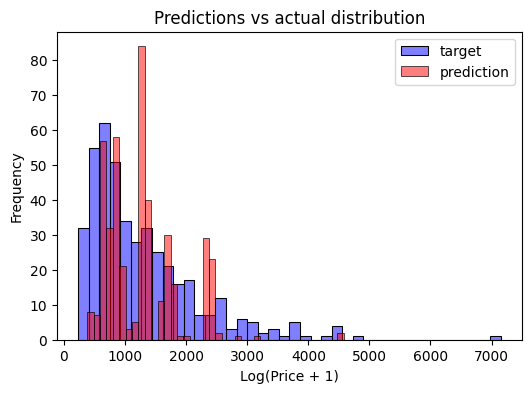

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

#### Linear regression (with regularization)

In [18]:
X_train = prepare_X(df_train, fillna_value=0)
X_val = prepare_X(df_val, fillna_value=0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s %0.2f' %(r, rmse(y_val, y_pred)))

     0 597.36
  0.01 597.36
   0.1 597.35
     1 597.21
     5 597.01
    10 597.06
   100 597.90


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [21]:
all_score = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = creat_validation_framework(x=seed)
    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)
    print('seed: %4s, rmse score: %0.3f' %(seed, rmse(y_val, y_pred)))
    all_score.append(rmse(y_val, y_pred))

print('std: %.3f' %np.std(all_score))

seed:    0, rmse score: 565.452
seed:    1, rmse score: 636.799
seed:    2, rmse score: 588.956
seed:    3, rmse score: 597.815
seed:    4, rmse score: 571.963
seed:    5, rmse score: 573.238
seed:    6, rmse score: 647.344
seed:    7, rmse score: 550.440
seed:    8, rmse score: 587.334
seed:    9, rmse score: 576.102
std: 29.176


### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [22]:
df_train, df_val, df_test, y_train, y_val, y_test = creat_validation_framework(x=9)

In [27]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print('rmse: %0.3f' %result)

rmse: 608.610
